In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

In [2]:
df_calendar = pd.read_csv(r"/Users/sohinipalit/Documents/Final project/airbnb dataset/calendar.csv")
df_calendar

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN
...,...,...,...,...
1393565,10208623,2016-12-29,f,NaN
1393566,10208623,2016-12-30,f,NaN
1393567,10208623,2016-12-31,f,NaN
1393568,10208623,2017-01-01,f,NaN


In [3]:
df_listings = pd.read_csv(r"/Users/sohinipalit/Documents/Final project/airbnb dataset/listings.csv")
df_listings

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3813,8101950,https://www.airbnb.com/rooms/8101950,20160104002432,2016-01-04,3BR Mountain View House in Seattle,Our 3BR/2BA house boasts incredible views of t...,"Our 3BR/2BA house bright, stylish, and wheelch...",Our 3BR/2BA house boasts incredible views of t...,none,We're located near lots of family fun. Woodlan...,...,8.0,f,NaN,WASHINGTON,f,strict,f,f,8,0.30
3814,8902327,https://www.airbnb.com/rooms/8902327,20160104002432,2016-01-04,Portage Bay View!-One Bedroom Apt,800 square foot 1 bedroom basement apartment w...,This space has a great view of Portage Bay wit...,800 square foot 1 bedroom basement apartment w...,none,The neighborhood is a quiet oasis that is clos...,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,1,2.00
3815,10267360,https://www.airbnb.com/rooms/10267360,20160104002432,2016-01-04,Private apartment view of Lake WA,"Very comfortable lower unit. Quiet, charming m...",NaN,"Very comfortable lower unit. Quiet, charming m...",none,NaN,...,NaN,f,NaN,WASHINGTON,f,moderate,f,f,1,NaN
3816,9604740,https://www.airbnb.com/rooms/9604740,20160104002432,2016-01-04,Amazing View with Modern Comfort!,Cozy studio condo in the heart on Madison Park...,Fully furnished unit to accommodate most needs...,Cozy studio condo in the heart on Madison Park...,none,Madison Park offers a peaceful slow pace upsca...,...,NaN,f,NaN,WASHINGTON,f,moderate,f,f,1,NaN


In [39]:
df_reviews = pd.read_csv(r"/Users/sohinipalit/Documents/Final project/airbnb dataset/reviews.csv")
df_reviews

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...
...,...,...,...,...,...,...
84844,3624990,50436321,2015-10-12,37419458,Ryan,The description and pictures of the apartment ...
84845,3624990,51024875,2015-10-17,6933252,Linda,We had an excellent stay. It was clean and com...
84846,3624990,51511988,2015-10-20,19543701,Jaime,"Gran ubicación, cerca de todo lo atractivo del..."
84847,3624990,52814482,2015-11-02,24445024,Jørgen,"Very good apartement, clean and well sized. Si..."


In [5]:
df_calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [6]:
df_calendar.describe()

,listing_id
count,1.393570e+06
mean,5.550111e+06
std,2.962274e+06
min,3.335000e+03
25%,3.258213e+06
50%,6.118244e+06
75%,8.035212e+06
max,1.034016e+07


In [7]:
df_calendar.shape

(1393570, 4)

In [8]:
df_listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [9]:
df_listings.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,...,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,...,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,...,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,...,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,...,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,...,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000
75%,8.035127e+06,2.016010e+13,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,...,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,...,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


In [10]:
df_listings.shape

(3818, 92)

In [40]:
df_reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [12]:
df_reviews.describe()

,listing_id,id,reviewer_id
count,8.484900e+04,8.484900e+04,8.484900e+04
mean,3.005067e+06,3.058765e+07,1.701301e+07
std,2.472877e+06,1.636613e+07,1.353704e+07
min,4.291000e+03,3.721000e+03,1.500000e+01
25%,7.946330e+05,1.725127e+07,5.053141e+06
50%,2.488228e+06,3.228809e+07,1.413476e+07
75%,4.694479e+06,4.457648e+07,2.762402e+07
max,1.024814e+07,5.873651e+07,5.281274e+07


In [13]:
df_reviews.shape

(84849, 6)

In [14]:
# Display a list of all columns
df_listings_all_columns = df_listings.columns.tolist()
print("\nListings columns\n")
print(df_listings_all_columns)

df_calendar_all_columns = df_calendar.columns.tolist()
print("\nCalendar columns\n")
print(df_calendar_all_columns)

df_reviews_all_columns = df_reviews.columns.tolist()
print("\nReviews columns\n")
print(df_reviews_all_columns)


Listings columns

['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary', 'space', 'description', 'experiences_offered', 'neighborhood_overview', 'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'street', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market', 'smart_location', 'country_code', 'country', 'latitude', 'longitude', 'is_location_exact', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'square_feet', 'price', 'weekly_price', 'monthly_price', 'security_deposit', 'c

In [15]:
df_listings.dtypes

id                                    int64
listing_url                          object
scrape_id                             int64
last_scraped                         object
name                                 object
                                     ...   
cancellation_policy                  object
require_guest_profile_picture        object
require_guest_phone_verification     object
calculated_host_listings_count        int64
reviews_per_month                   float64
Length: 92, dtype: object

In [16]:
# Check for missing values in listings.csv
df_listings_missing_values = df_listings.isnull().sum()

# Filter columns with missing values
print(df_listings_missing_values[df_listings_missing_values > 0])

summary                         177
space                           569
neighborhood_overview          1032
notes                          1606
transit                         934
thumbnail_url                   320
medium_url                      320
xl_picture_url                  320
host_name                         2
host_since                        2
host_location                     8
host_about                      859
host_response_time              523
host_response_rate              523
host_acceptance_rate            773
host_is_superhost                 2
host_thumbnail_url                2
host_picture_url                  2
host_neighbourhood              300
host_listings_count               2
host_total_listings_count         2
host_verifications                2
host_has_profile_pic              2
host_identity_verified            2
neighbourhood                   416
zipcode                           7
property_type                     1
bathrooms                   

In [17]:
# Check for missing values in each column in calendar.csv
df_calendar.isnull().sum()

listing_id         0
date               0
available          0
price         459028
dtype: int64

In [18]:
# Check for missing values in each column in reviews.csv
df_reviews.isnull().sum()

listing_id        0
id                0
date              0
reviewer_id       0
reviewer_name     0
comments         18
dtype: int64

In [19]:
#Total number of listings
print("Total listings : ", df_listings['id'].count())
#Total number of distinct hosts
print("Total hosts : ", len(df_listings['host_id'].unique()))

Total listings :  3818
Total hosts :  2751


In [20]:
#DATA PREPROCESSING

In [21]:
# Convert 'host_since' to datetime format and extract year
df_listings['host_since_year'] = pd.to_datetime(df_listings['host_since']).dt.year

# Drop the 'host_since' column
df_listings = df_listings.drop('host_since', axis=1)

# Convert 'host response rate' to numeric format
df_listings['host_response_rate'] = df_listings['host_response_rate'].replace('%', '', regex=True).astype(float)

# Convert 'host_listings_count' to numeric format
df_listings['price'] = pd.to_numeric(df_listings['price'].replace('[\$,]', '', regex=True), errors='coerce')

# Convert 'cleaning_fee' to numeric format
df_listings['cleaning_fee'] = pd.to_numeric(df_listings['cleaning_fee'].replace('[\$,]', '', regex=True), errors='coerce')

# Convert 'host_is_superhost' to boolean
df_listings['host_is_superhost'] = df_listings['host_is_superhost'] == 't'

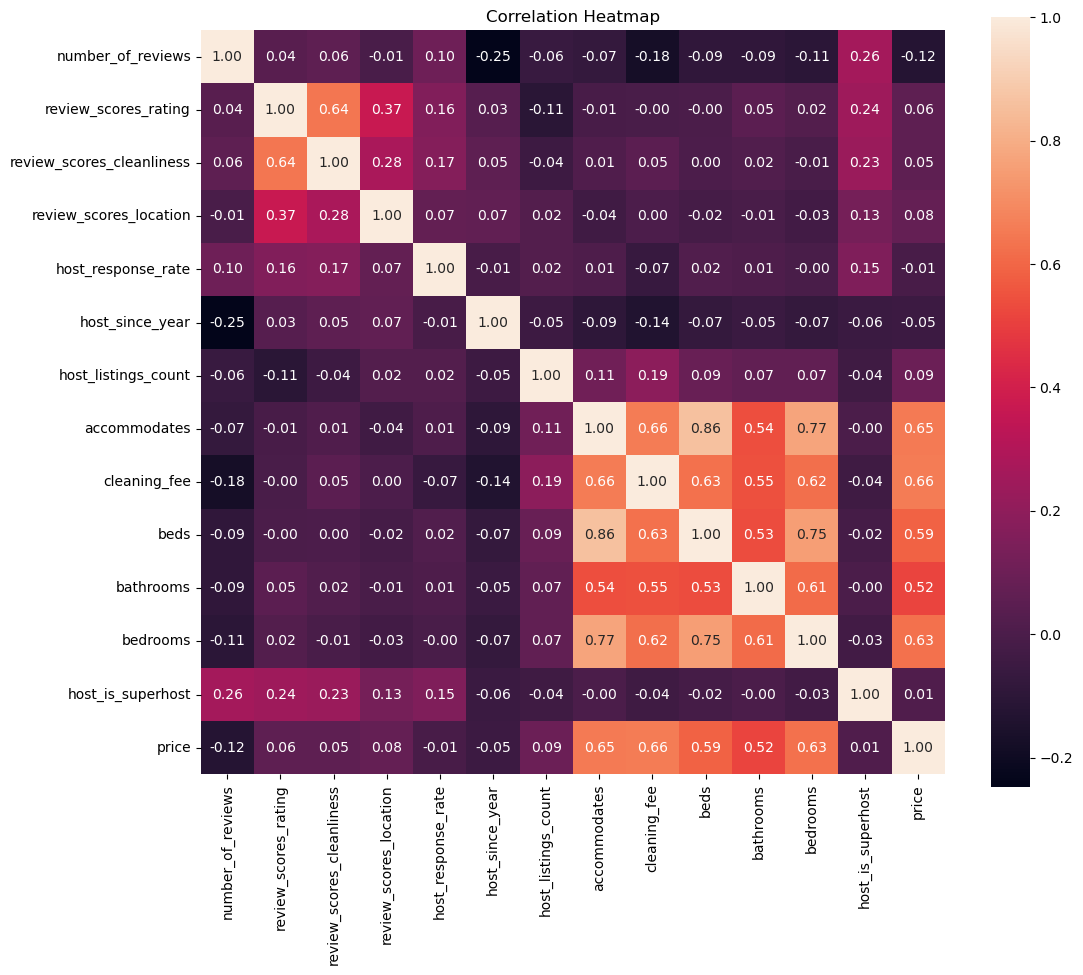

In [22]:
# Select specific columns
cols = ['number_of_reviews', 'review_scores_rating', 'review_scores_cleanliness', 'review_scores_location', 
        'host_response_rate', 'host_since_year','host_listings_count', 'accommodates', 'cleaning_fee', 'beds', 
        'bathrooms', 'bedrooms', 'host_is_superhost', 'price']

# Set a larger figure size
plt.figure(figsize=(12, 10))

# Create the heatmap
sns.heatmap(df_listings[cols].corr(), cbar=True, annot=True, square=True,
            fmt='.2f', yticklabels=cols, xticklabels=cols)

plt.title('Correlation Heatmap')
plt.show()

In [23]:
#ONE-HOT ENCODING - Property Type

# Filter the DataFrame for rows with specific fields
df_filtered = df_listings[df_listings['property_type'].isin(['Apartment', 'House'])]

# Perform one-hot encoding on the 'property_type' column
df_listings_encoded = pd.get_dummies(df_filtered['property_type'], prefix='property')
print(df_listings_encoded)

# Concatenate the one-hot encoded columns with the original DataFrame
df_listings = pd.concat([df_listings, df_listings_encoded], axis=1)
print(df_listings)

      property_Apartment  property_House
0                   True           False
1                   True           False
2                  False            True
3                   True           False
4                  False            True
...                  ...             ...
3812                True           False
3813               False            True
3814                True           False
3815               False            True
3817                True           False

[3441 rows x 2 columns]
            id                            listing_url       scrape_id  \
0       241032    https://www.airbnb.com/rooms/241032  20160104002432   
1       953595    https://www.airbnb.com/rooms/953595  20160104002432   
2      3308979   https://www.airbnb.com/rooms/3308979  20160104002432   
3      7421966   https://www.airbnb.com/rooms/7421966  20160104002432   
4       278830    https://www.airbnb.com/rooms/278830  20160104002432   
...        ...                               

In [24]:
#ONE-HOT ENCODING - Room Type

# Perform one-hot encoding on the 'room_type' column
df_listings_encoded = pd.get_dummies(df_listings['room_type'], prefix='property')
print(df_listings_encoded)

# Concatenate the one-hot encoded columns with the original DataFrame
df_listings = pd.concat([df_listings, df_listings_encoded], axis=1)
print(df_listings)

      property_Entire home/apt  property_Private room  property_Shared room
0                         True                  False                 False
1                         True                  False                 False
2                         True                  False                 False
3                         True                  False                 False
4                         True                  False                 False
...                        ...                    ...                   ...
3813                      True                  False                 False
3814                      True                  False                 False
3815                      True                  False                 False
3816                      True                  False                 False
3817                      True                  False                 False

[3818 rows x 3 columns]
            id                            listing_url       scr

In [25]:
#Missing values analysis

selected_columns = ['number_of_reviews', 'review_scores_rating', 'review_scores_cleanliness', 'review_scores_location', 'host_response_rate', 'host_since_year', 'host_listings_count', 'accommodates', 'cleaning_fee', 'beds', 'bathrooms', 'bedrooms', 'square_feet', 'property_Apartment', 'property_House', 'host_is_superhost', 'property_Entire home/apt', 'property_Private room', 'property_Shared room']

# Calculate total missing values for each selected column
missing_values = df_listings[selected_columns].isnull().sum()

# Display the result
print("Total Missing Values in Each Column:")
print(missing_values)

Total Missing Values in Each Column:
number_of_reviews               0
review_scores_rating          647
review_scores_cleanliness     653
review_scores_location        655
host_response_rate            523
host_since_year                 2
host_listings_count             2
accommodates                    0
cleaning_fee                 1030
beds                            1
bathrooms                      16
bedrooms                        6
square_feet                  3721
property_Apartment            377
property_House                377
host_is_superhost               0
property_Entire home/apt        0
property_Private room           0
property_Shared room            0
dtype: int64


In [26]:
#List of columns to drop missing values
columns_drop_na = ['beds', 'bathrooms', 'bedrooms', 'host_since_year', 'host_listings_count', 'property_Apartment', 'property_House']

# Remove rows with missing values in the specified columns
df_listings_cleaned = df_listings.dropna(subset=columns_drop_na)

df_listings_cleaned.shape

(3419, 97)

In [27]:
#IMPUTING VALUES FOR MISSING VALUES - 'cleaning_fee'

# Calculate the median
cleaning_fee_median = df_listings_cleaned['cleaning_fee'].median()

# Fill in missing values in 'cleaning_fee' column with median
df_listings_cleaned.loc[:, 'cleaning_fee'] = df_listings_cleaned['cleaning_fee'].fillna(cleaning_fee_median)


# # # Technique 2 - Use KNN for imputation
# knn_imputer = KNNImputer(n_neighbors=2)

# # KNN imputation on the 'cleaning_fee' column
# df_listings_cleaned.loc[:, 'cleaning_fee'] = knn_imputer.fit_transform(df_listings_cleaned[['cleaning_fee']])

Mean Absolute Error: 34.802157392834665
Mean Squared Error: 2821.654331522328
R-squared: 0.6204909946481875


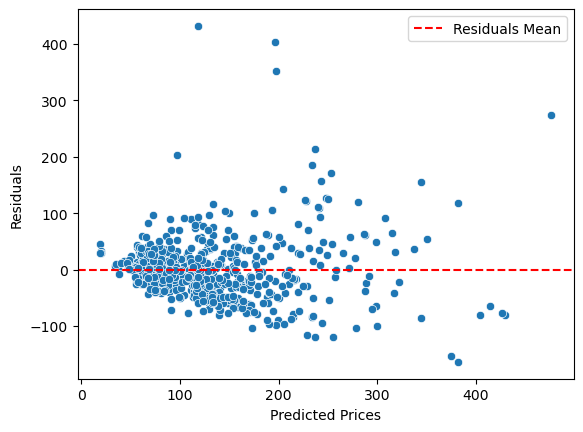

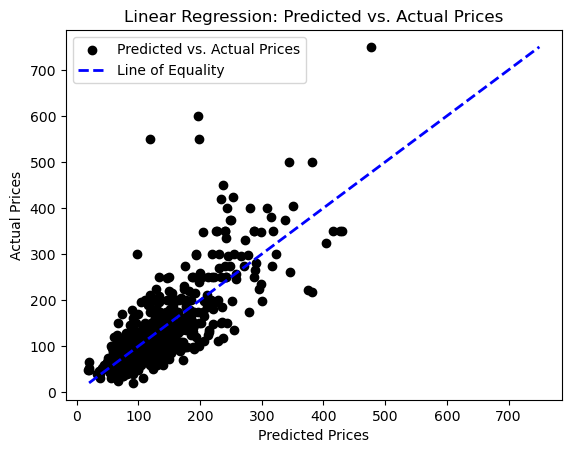

In [28]:
# Select relevant columns as features (X) and target variable (y)
features = ['beds', 'bathrooms', 'bedrooms','number_of_reviews', 'accommodates', 'property_Apartment', 'property_House', 'cleaning_fee', 'host_is_superhost', 'property_Entire home/apt', 'property_Private room', 'property_Shared room']

X = df_listings_cleaned[features]  # Feature matrix
y = df_listings_cleaned['price']    # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Calculate residuals
residuals = y_test - predictions

# Create a residual plot
sns.scatterplot(x=predictions, y=residuals)
plt.axhline(y=0, color='r', linestyle='--', label='Residuals Mean')
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.legend()
plt.show()


# Plot the predicted prices vs. actual prices
plt.scatter(predictions, y_test, color='black', label='Predicted vs. Actual Prices')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='blue', linewidth=2, label='Line of Equality')
plt.xlabel('Predicted Prices')
plt.ylabel('Actual Prices')
plt.legend()
plt.title('Linear Regression: Predicted vs. Actual Prices')
plt.show()

In [29]:
#ANALYZE SUMMARY, AMENITIES AND REVIEWS

In [30]:
print("Top 5 Summary by price :")
top5_summary_by_price = df_listings.sort_values(by='price', ascending=False).head(5)
print(top5_summary_by_price[['summary', 'price']])

Top 5 Summary by price :
                                                summary   price
3122  2 bedroom fully finished basement apartment wi...  1000.0
1208  100% Walk Score close to the Convention Center...   999.0
2     New modern house built in 2013.  Spectacular s...   975.0
3443  Beautiful home that is located quiet neighborh...   950.0
1279  Fully updated by professional interior designe...   899.0


In [31]:
print("Top 5 Amenities by price :")
top5_amenities_by_price = df_listings.sort_values(by='price', ascending=False).head(5)
print(top5_amenities_by_price[['amenities', 'price']])

Top 5 Amenities by price :
                                              amenities   price
3122  {"Wireless Internet","Free Parking on Premises...  1000.0
1208  {Internet,"Wireless Internet",Kitchen,"Elevato...   999.0
2     {TV,"Cable TV",Internet,"Wireless Internet","A...   975.0
3443  {TV,"Cable TV",Internet,"Wireless Internet",Po...   950.0
1279  {TV,"Cable TV",Internet,"Wireless Internet","A...   899.0


In [32]:
# Inner join on the column 'id' in df_listings and 'listing_id' in df_reviews
merged_df = pd.merge(df_listings, df_reviews, left_on='id', right_on='listing_id', how='inner')

# Sort the merged DataFrame by 'price' in descending order and select the top 5 rows
top5_reviews_by_price = merged_df.sort_values(by='price', ascending=False).head(5)

print("Top 5 Reviews by price :")
print(top5_reviews_by_price[['comments', 'price']])

Top 5 Reviews by price :
                                                comments   price
70259  Christina and Evan (and their dog, Mori!) are ...  1000.0
26282  Everything was really good. Location is pretty...   999.0
26317  The apartment was OK but a little shabbier tha...   999.0
26311  We had a great time at Amy's place. Appreciate...   999.0
26312  This place is great! The greatest thing about ...   999.0


In [ ]:
#WORD CLOUD - SUMMARY

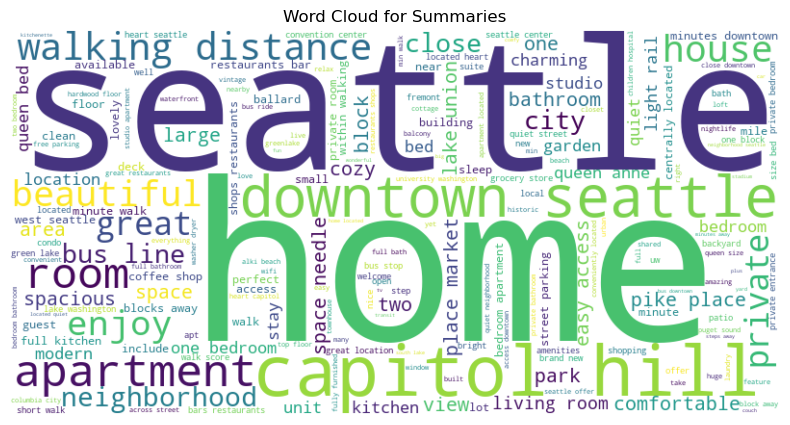

In [54]:
# Create a string containing all summaries
all_summaries = ' '.join(df_listings['summary'].dropna())

# Tokenize the text
tokens = word_tokenize(all_summaries)

# Remove punctuation and convert to lowercase
filtered_tokens = [word.lower() for word in tokens if word.isalpha()]

# Remove stop words
stop_words = set(stopwords.words('english'))
filtered_tokens = [word for word in filtered_tokens if word not in stop_words]

# Join the filtered tokens back in a string
filtered_summaries = ' '.join(filtered_tokens)

# Create the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(filtered_summaries)

# Plot WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Summaries')
plt.show()

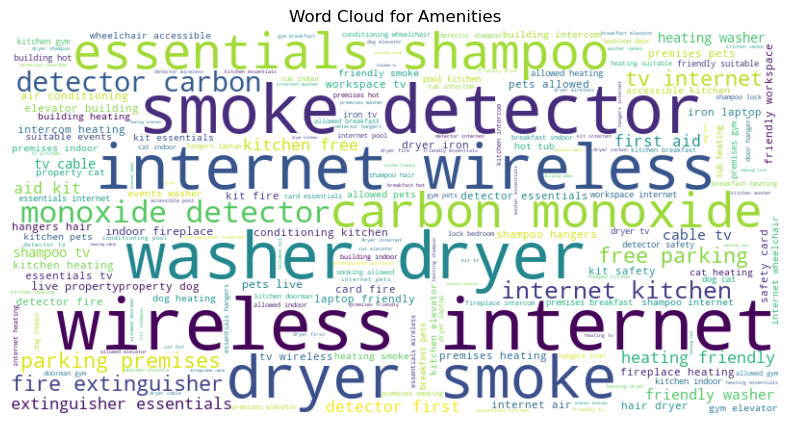

In [53]:
# Create a string containing all amenities
all_summaries = ' '.join(df_listings['amenities'].dropna())

# Tokenize the text
tokens = word_tokenize(all_summaries)

# Remove punctuation and convert to lowercase
filtered_tokens = [word.lower() for word in tokens if word.isalpha()]

# Remove stop words
stop_words = set(stopwords.words('english'))
filtered_tokens = [word for word in filtered_tokens if word not in stop_words]

# Join the filtered tokens back in a string
filtered_summaries = ' '.join(filtered_tokens)

# Create the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(filtered_summaries)

# Plot WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Amenities')
plt.show()

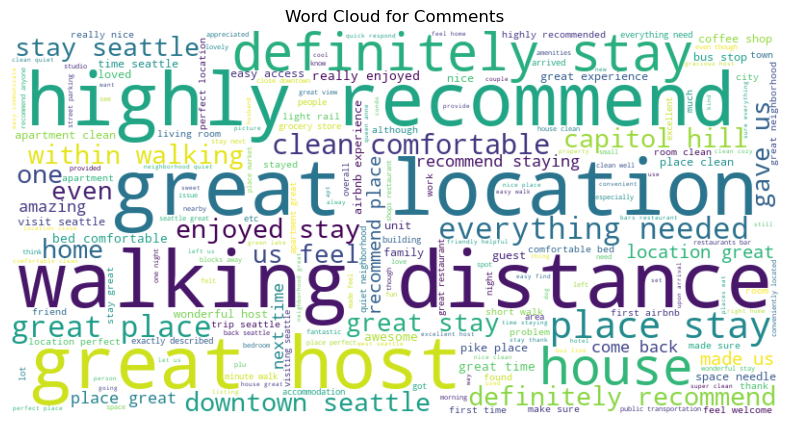

In [38]:
# Create a string containing all amenities
all_summaries = ' '.join(df_reviews['comments'].dropna())

# Tokenize the text
tokens = word_tokenize(all_summaries)

# Remove punctuation and convert to lowercase
filtered_tokens = [word.lower() for word in tokens if word.isalpha()]

# Remove stop words
stop_words = set(stopwords.words('english'))
filtered_tokens = [word for word in filtered_tokens if word not in stop_words]

# Join the filtered tokens back in a string
filtered_summaries = ' '.join(filtered_tokens)

# Create the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(filtered_summaries)

# Plot WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Comments')
plt.show()